# Librerias

In [1]:
import pandas as pd
import numpy as np

from tqdm import tqdm

import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.model_selection import train_test_split
plt.rcParams["figure.figsize"] = (10,8)

import statsmodels.formula.api as smf


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn import tree



from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Carga de datos

In [3]:
df = pd.read_csv("../../01_data/05_modelo5/train5.csv", index_col = 0)
df.head(2)

,depth,table,x,price,cut_encoded,color_encoded,clarity_encoded
carat,,,,,,,
0.30,62.4,58.0,4.31,6.353,3.0,5.0,0.0
1.01,62.7,56.0,6.42,9.183,4.0,6.0,5.0


# Reparto de datos en train y test

In [4]:
# ==============================================================================
# Lo primero que hacemos es definir cuál es nuestra variable Y y nuestras variables X
X = df.drop(['price'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [5]:
print("Datos de entrenamiento")
print("-----------------------")
print(y_train.describe())

Datos de entrenamiento
-----------------------
count    32364.000000
mean         7.786349
std          1.018371
min          5.787000
25%          6.851000
50%          7.784000
75%          8.584000
max          9.842000
Name: price, dtype: float64


In [6]:
print("Datos de testeo")
print("-----------------------")
print(y_test.describe())

Datos de testeo
-----------------------
count    8091.000000
mean        7.773714
std         1.010634
min         5.814000
25%         6.851500
50%         7.761000
75%         8.572500
max         9.842000
Name: price, dtype: float64


# Decision Tree

In [7]:
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

CPU times: total: 0 ns
Wall time: 0 ns


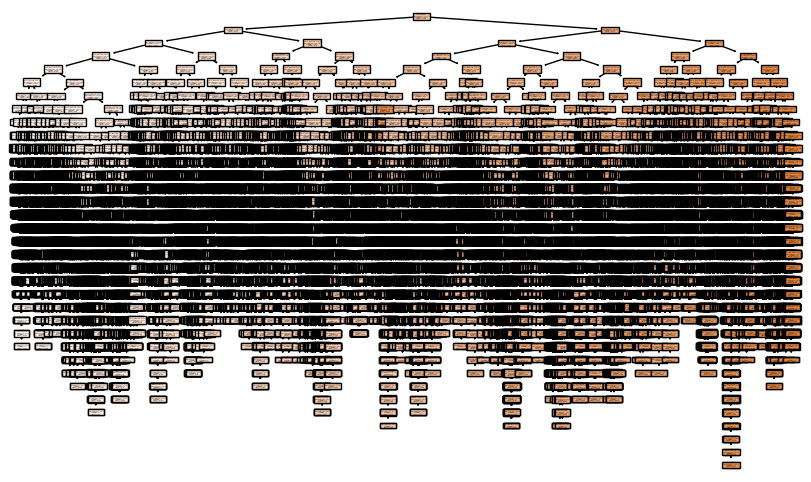

In [8]:
%time
fig = plt.figure(figsize=(10, 6))
tree.plot_tree(regressor, feature_names=X_train.columns, filled=True)
plt.show();

In [9]:
# max features

max_features = np.sqrt(len(X_train.columns))
max_features

2.449489742783178

In [10]:
# max depth

print(regressor.tree_.max_depth)

34


In [11]:
# hacemos las predicciones sobre los dos set de datos el X_test y el X_train
y_pred_test_dt = regressor.predict(X_test)
y_pred_train_dt = regressor.predict(X_train)

In [12]:
def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    
    
    resultados = {'MAE': [metrics.mean_absolute_error(y_test, y_test_pred), metrics.mean_absolute_error(y_train, y_train_pred)],
                'MSE': [metrics.mean_squared_error(y_test, y_test_pred), metrics.mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)), np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))],
                'R2':  [metrics.r2_score(y_test, y_test_pred), metrics.r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df

In [13]:
# sacamos las métricas para ver si hay overfitting

dt_results1 = metricas(y_test, y_train, y_pred_test_dt, y_pred_train_dt, "Decission Tree I")
dt_results1

,MAE,MSE,RMSE,R2,set,modelo
0,0.109244,0.024134,0.155350,0.976369,test,Decission Tree I
1,0.000821,0.000072,0.008482,0.999931,train,Decission Tree I


In [14]:
# Generación del GridSearch
# ==============================================================================

# definimos un diccionario con los hiperparámetros que queremos testear. 
param = {"max_depth": [4, 5, 6, 7],
        "min_samples_split": [10, 50, 100],
        "max_features": [1,2,3,4,5,6]}

gs = GridSearchCV(
            estimator=DecisionTreeRegressor(),
            param_grid= param,
            cv=10,
            verbose=3,
            return_train_score = True,
            scoring="neg_mean_squared_error")

In [15]:
# ajustamos el modelo de nuevo

%time
gs.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 0 ns
Fitting 10 folds for each of 72 candidates, totalling 720 fits
[CV 1/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.888, test=-0.913) total time=   0.0s
[CV 2/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-1.018, test=-1.028) total time=   0.0s
[CV 3/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.208, test=-0.214) total time=   0.0s
[CV 4/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.872, test=-0.909) total time=   0.0s
[CV 5/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.900, test=-0.890) total time=   0.0s
[CV 6/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.865, test=-0.887) total time=   0.0s
[CV 7/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.694, test=-0.683) total time=   0.0s
[CV 8/10] END max_depth=4, max_features=1, min_samples_split=10;,

[CV 6/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.107, test=-0.104) total time=   0.0s
[CV 7/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.073, test=-0.073) total time=   0.0s
[CV 8/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.155, test=-0.155) total time=   0.0s
[CV 9/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.184, test=-0.183) total time=   0.0s
[CV 10/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.068, test=-0.072) total time=   0.0s
[CV 1/10] END max_depth=4, max_features=3, min_samples_split=100;, score=(train=-0.107, test=-0.107) total time=   0.0s
[CV 2/10] END max_depth=4, max_features=3, min_samples_split=100;, score=(train=-0.078, test=-0.081) total time=   0.0s
[CV 3/10] END max_depth=4, max_features=3, min_samples_split=100;, score=(train=-0.063, test=-0.066) total time=   0.0s
[CV 4/10] END max_depth=4, max_features=3, m

[CV 5/10] END max_depth=4, max_features=5, min_samples_split=100;, score=(train=-0.057, test=-0.057) total time=   0.0s
[CV 6/10] END max_depth=4, max_features=5, min_samples_split=100;, score=(train=-0.056, test=-0.056) total time=   0.0s
[CV 7/10] END max_depth=4, max_features=5, min_samples_split=100;, score=(train=-0.060, test=-0.062) total time=   0.0s
[CV 8/10] END max_depth=4, max_features=5, min_samples_split=100;, score=(train=-0.057, test=-0.055) total time=   0.0s
[CV 9/10] END max_depth=4, max_features=5, min_samples_split=100;, score=(train=-0.059, test=-0.060) total time=   0.0s
[CV 10/10] END max_depth=4, max_features=5, min_samples_split=100;, score=(train=-0.058, test=-0.060) total time=   0.0s
[CV 1/10] END max_depth=4, max_features=6, min_samples_split=10;, score=(train=-0.057, test=-0.058) total time=   0.0s
[CV 2/10] END max_depth=4, max_features=6, min_samples_split=10;, score=(train=-0.056, test=-0.059) total time=   0.0s
[CV 3/10] END max_depth=4, max_features=6

[CV 1/10] END max_depth=5, max_features=2, min_samples_split=50;, score=(train=-0.115, test=-0.112) total time=   0.0s
[CV 2/10] END max_depth=5, max_features=2, min_samples_split=50;, score=(train=-0.252, test=-0.265) total time=   0.0s
[CV 3/10] END max_depth=5, max_features=2, min_samples_split=50;, score=(train=-0.322, test=-0.324) total time=   0.0s
[CV 4/10] END max_depth=5, max_features=2, min_samples_split=50;, score=(train=-0.067, test=-0.068) total time=   0.0s
[CV 5/10] END max_depth=5, max_features=2, min_samples_split=50;, score=(train=-0.074, test=-0.075) total time=   0.0s
[CV 6/10] END max_depth=5, max_features=2, min_samples_split=50;, score=(train=-0.123, test=-0.119) total time=   0.0s
[CV 7/10] END max_depth=5, max_features=2, min_samples_split=50;, score=(train=-0.525, test=-0.524) total time=   0.0s
[CV 8/10] END max_depth=5, max_features=2, min_samples_split=50;, score=(train=-0.168, test=-0.165) total time=   0.0s
[CV 9/10] END max_depth=5, max_features=2, min_s

[CV 6/10] END max_depth=5, max_features=4, min_samples_split=100;, score=(train=-0.045, test=-0.046) total time=   0.0s
[CV 7/10] END max_depth=5, max_features=4, min_samples_split=100;, score=(train=-0.079, test=-0.081) total time=   0.0s
[CV 8/10] END max_depth=5, max_features=4, min_samples_split=100;, score=(train=-0.045, test=-0.045) total time=   0.0s
[CV 9/10] END max_depth=5, max_features=4, min_samples_split=100;, score=(train=-0.047, test=-0.048) total time=   0.0s
[CV 10/10] END max_depth=5, max_features=4, min_samples_split=100;, score=(train=-0.062, test=-0.065) total time=   0.0s
[CV 1/10] END max_depth=5, max_features=5, min_samples_split=10;, score=(train=-0.046, test=-0.047) total time=   0.0s
[CV 2/10] END max_depth=5, max_features=5, min_samples_split=10;, score=(train=-0.045, test=-0.047) total time=   0.0s
[CV 3/10] END max_depth=5, max_features=5, min_samples_split=10;, score=(train=-0.045, test=-0.046) total time=   0.0s
[CV 4/10] END max_depth=5, max_features=5,

[CV 7/10] END max_depth=6, max_features=1, min_samples_split=10;, score=(train=-0.315, test=-0.323) total time=   0.0s
[CV 8/10] END max_depth=6, max_features=1, min_samples_split=10;, score=(train=-0.739, test=-0.712) total time=   0.0s
[CV 9/10] END max_depth=6, max_features=1, min_samples_split=10;, score=(train=-0.192, test=-0.189) total time=   0.0s
[CV 10/10] END max_depth=6, max_features=1, min_samples_split=10;, score=(train=-0.144, test=-0.152) total time=   0.0s
[CV 1/10] END max_depth=6, max_features=1, min_samples_split=50;, score=(train=-0.198, test=-0.206) total time=   0.0s
[CV 2/10] END max_depth=6, max_features=1, min_samples_split=50;, score=(train=-0.778, test=-0.777) total time=   0.0s
[CV 3/10] END max_depth=6, max_features=1, min_samples_split=50;, score=(train=-0.110, test=-0.115) total time=   0.0s
[CV 4/10] END max_depth=6, max_features=1, min_samples_split=50;, score=(train=-0.386, test=-0.403) total time=   0.0s
[CV 5/10] END max_depth=6, max_features=1, min_

[CV 8/10] END max_depth=6, max_features=3, min_samples_split=50;, score=(train=-0.137, test=-0.141) total time=   0.0s
[CV 9/10] END max_depth=6, max_features=3, min_samples_split=50;, score=(train=-0.052, test=-0.051) total time=   0.0s
[CV 10/10] END max_depth=6, max_features=3, min_samples_split=50;, score=(train=-0.075, test=-0.080) total time=   0.0s
[CV 1/10] END max_depth=6, max_features=3, min_samples_split=100;, score=(train=-0.074, test=-0.074) total time=   0.0s
[CV 2/10] END max_depth=6, max_features=3, min_samples_split=100;, score=(train=-0.069, test=-0.074) total time=   0.0s
[CV 3/10] END max_depth=6, max_features=3, min_samples_split=100;, score=(train=-0.077, test=-0.081) total time=   0.0s
[CV 4/10] END max_depth=6, max_features=3, min_samples_split=100;, score=(train=-0.132, test=-0.134) total time=   0.0s
[CV 5/10] END max_depth=6, max_features=3, min_samples_split=100;, score=(train=-0.051, test=-0.051) total time=   0.0s
[CV 6/10] END max_depth=6, max_features=3,

[CV 2/10] END max_depth=6, max_features=6, min_samples_split=10;, score=(train=-0.033, test=-0.035) total time=   0.0s
[CV 3/10] END max_depth=6, max_features=6, min_samples_split=10;, score=(train=-0.033, test=-0.034) total time=   0.0s
[CV 4/10] END max_depth=6, max_features=6, min_samples_split=10;, score=(train=-0.032, test=-0.034) total time=   0.0s
[CV 5/10] END max_depth=6, max_features=6, min_samples_split=10;, score=(train=-0.034, test=-0.031) total time=   0.0s
[CV 6/10] END max_depth=6, max_features=6, min_samples_split=10;, score=(train=-0.033, test=-0.033) total time=   0.0s
[CV 7/10] END max_depth=6, max_features=6, min_samples_split=10;, score=(train=-0.033, test=-0.033) total time=   0.0s
[CV 8/10] END max_depth=6, max_features=6, min_samples_split=10;, score=(train=-0.033, test=-0.033) total time=   0.0s
[CV 9/10] END max_depth=6, max_features=6, min_samples_split=10;, score=(train=-0.033, test=-0.035) total time=   0.0s
[CV 10/10] END max_depth=6, max_features=6, min_

[CV 5/10] END max_depth=7, max_features=2, min_samples_split=50;, score=(train=-0.133, test=-0.134) total time=   0.0s
[CV 6/10] END max_depth=7, max_features=2, min_samples_split=50;, score=(train=-0.315, test=-0.311) total time=   0.0s
[CV 7/10] END max_depth=7, max_features=2, min_samples_split=50;, score=(train=-0.360, test=-0.386) total time=   0.0s
[CV 8/10] END max_depth=7, max_features=2, min_samples_split=50;, score=(train=-0.090, test=-0.094) total time=   0.0s
[CV 9/10] END max_depth=7, max_features=2, min_samples_split=50;, score=(train=-0.117, test=-0.121) total time=   0.0s
[CV 10/10] END max_depth=7, max_features=2, min_samples_split=50;, score=(train=-0.269, test=-0.279) total time=   0.0s
[CV 1/10] END max_depth=7, max_features=2, min_samples_split=100;, score=(train=-0.186, test=-0.188) total time=   0.0s
[CV 2/10] END max_depth=7, max_features=2, min_samples_split=100;, score=(train=-0.173, test=-0.172) total time=   0.0s
[CV 3/10] END max_depth=7, max_features=2, mi

[CV 9/10] END max_depth=7, max_features=4, min_samples_split=100;, score=(train=-0.031, test=-0.034) total time=   0.0s
[CV 10/10] END max_depth=7, max_features=4, min_samples_split=100;, score=(train=-0.044, test=-0.048) total time=   0.0s
[CV 1/10] END max_depth=7, max_features=5, min_samples_split=10;, score=(train=-0.027, test=-0.030) total time=   0.0s
[CV 2/10] END max_depth=7, max_features=5, min_samples_split=10;, score=(train=-0.028, test=-0.031) total time=   0.0s
[CV 3/10] END max_depth=7, max_features=5, min_samples_split=10;, score=(train=-0.027, test=-0.028) total time=   0.0s
[CV 4/10] END max_depth=7, max_features=5, min_samples_split=10;, score=(train=-0.027, test=-0.028) total time=   0.0s
[CV 5/10] END max_depth=7, max_features=5, min_samples_split=10;, score=(train=-0.026, test=-0.026) total time=   0.0s
[CV 6/10] END max_depth=7, max_features=5, min_samples_split=10;, score=(train=-0.027, test=-0.027) total time=   0.0s
[CV 7/10] END max_depth=7, max_features=5, mi

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [4, 5, 6, 7],
                         'max_features': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=3)

In [16]:
# sacamos cual es el mejor de todos los que hemos testeado usando el método best_estimator_

best_tree = gs.best_estimator_
best_tree

DecisionTreeRegressor(max_depth=7, max_features=6, min_samples_split=10)

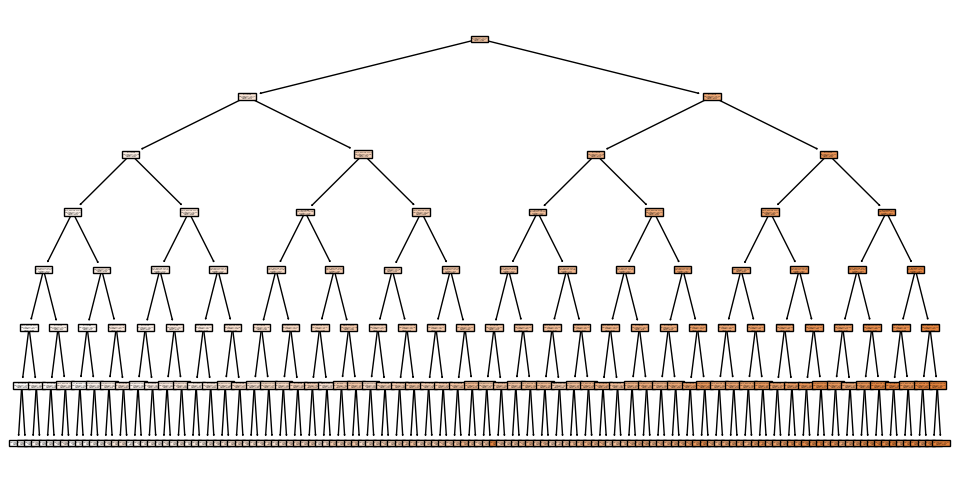

In [17]:
# volvamos a intentar visualizar el árbol a ver como se ve: 

fig = plt.figure(figsize=(12, 6))
tree.plot_tree(best_tree, feature_names=X_train.columns, filled=True);

In [18]:
 #guardamos la imagen 

fig.savefig("decision_tree.png", facecolor="white")

In [19]:
print(tree.export_text(best_tree, feature_names= list(X_train.columns)))

|--- x <= 5.62
|   |--- x <= 4.96
|   |   |--- x <= 4.61
|   |   |   |--- clarity_encoded <= 5.50
|   |   |   |   |--- color_encoded <= 2.50
|   |   |   |   |   |--- clarity_encoded <= 3.50
|   |   |   |   |   |   |--- x <= 4.38
|   |   |   |   |   |   |   |--- value: [6.14]
|   |   |   |   |   |   |--- x >  4.38
|   |   |   |   |   |   |   |--- value: [6.29]
|   |   |   |   |   |--- clarity_encoded >  3.50
|   |   |   |   |   |   |--- x <= 4.27
|   |   |   |   |   |   |   |--- value: [6.18]
|   |   |   |   |   |   |--- x >  4.27
|   |   |   |   |   |   |   |--- value: [6.42]
|   |   |   |   |--- color_encoded >  2.50
|   |   |   |   |   |--- x <= 4.28
|   |   |   |   |   |   |--- x <= 4.10
|   |   |   |   |   |   |   |--- value: [6.19]
|   |   |   |   |   |   |--- x >  4.10
|   |   |   |   |   |   |   |--- value: [6.37]
|   |   |   |   |   |--- x >  4.28
|   |   |   |   |   |   |--- clarity_encoded <= 2.50
|   |   |   |   |   |   |   |--- value: [6.38]
|   |   |   |   |   |   |--- cla

In [20]:
y_pred_test_dt2 = best_tree.predict(X_test)
y_pred_train_dt2 = best_tree.predict(X_train)

In [21]:
dt_results2 = metricas(y_test, y_train, y_pred_test_dt2, y_pred_train_dt2, "Decision tree II")

In [22]:
dt_results2

,MAE,MSE,RMSE,R2,set,modelo
0,0.121923,0.025651,0.160158,0.974883,test,Decision tree II
1,0.119339,0.024093,0.155218,0.976768,train,Decision tree II


# prueba predicciones 

In [23]:
df = pd.read_csv("../../01_data/05_modelo5/test5.csv", index_col = 0)
X_realida = df


In [24]:
X_realida_submision = best_tree.predict(X_realida)
X_realida_submision

array([6.28871709, 8.38746048, 9.37001299, ..., 6.63721462, 8.59309655,
       7.82862866])

In [25]:
submision1 = pd.DataFrame(X_realida_submision)
submision1.reset_index(inplace=True)
submision1.rename(columns={"index":"id",0:"price"}, inplace =True)
submision1

,id,price
0,0,6.288717
1,1,8.387460
2,2,9.370013
3,3,7.828629
4,4,9.182613
...,...,...
13480,13480,8.543352
13481,13481,8.348044
13482,13482,6.637215
13483,13483,8.593097


In [26]:
submision1.to_csv("../../01_data/df_submision5.csv", index=False)